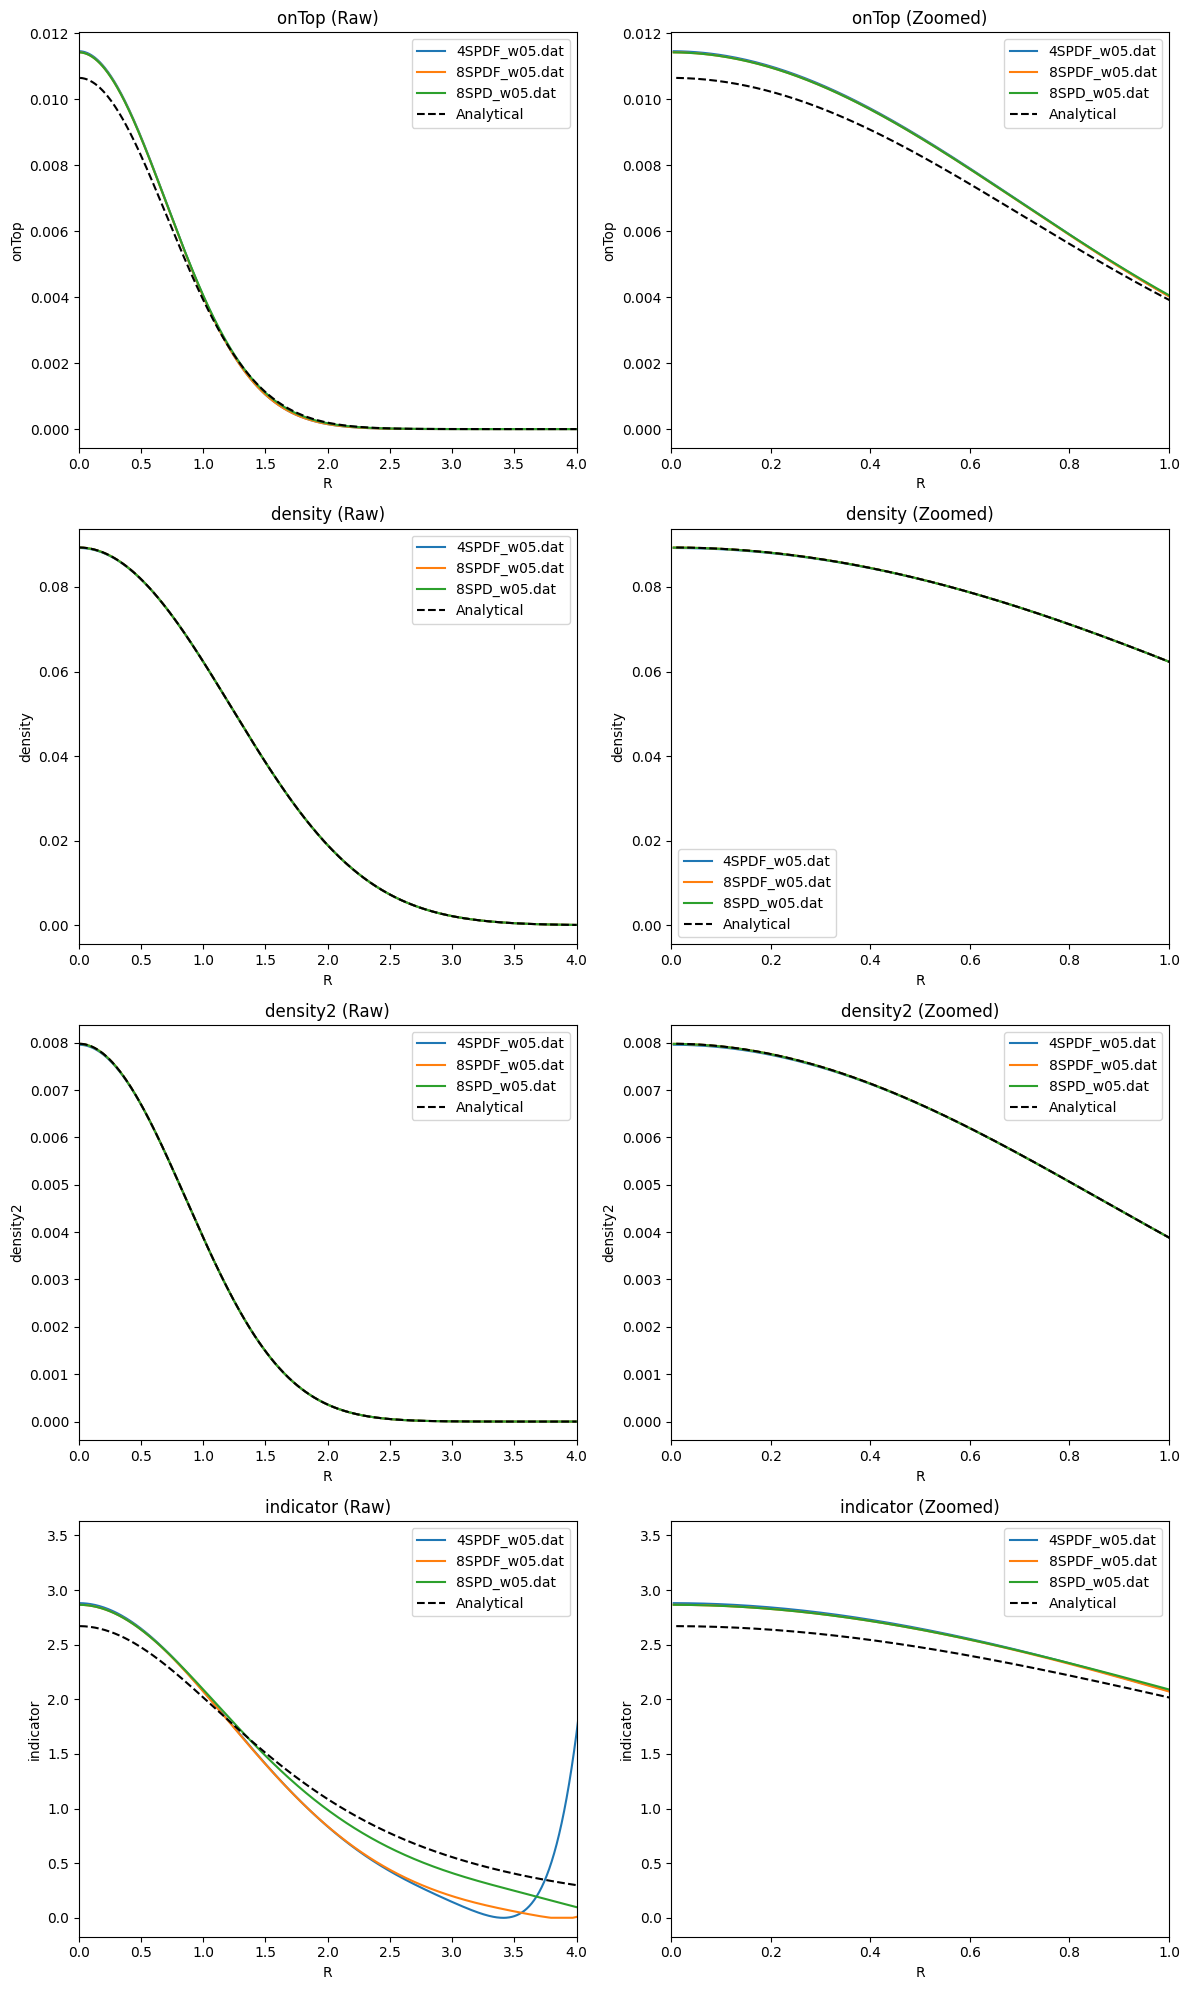

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Definir el path base
current_path = os.getcwd()

# 1. Leer el archivo CSV principal
csv_path = os.path.join(current_path, 'data/onTop_and_indicator_analytic.csv')
df_analitico = pd.read_csv(csv_path)

# Filtrar y limpiar datos analíticos
df_analitico = df_analitico[(df_analitico['indicator'] != "Indeterminate") & 
                            (df_analitico['indicator'] != "ComplexInfinity")]
df_analitico['indicator'] = pd.to_numeric(df_analitico['indicator'], errors='coerce')
df_analitico['density'] = pd.to_numeric(df_analitico['density'], errors='coerce')
df_analitico['density2'] = pd.to_numeric(df_analitico['density2'], errors='coerce')
df_analitico = df_analitico[(df_analitico['n'] == 2) & (df_analitico['R'] >= 0) & (df_analitico['R'] <= 5)]

# 2. Leer archivos numéricos desde la carpeta específica
data_dir = os.path.join(current_path, 'data/omega05')
file_names = ['4SPDF_w05.dat', '8SPDF_w05.dat', '8SPD_w05.dat']
column_names = ['R', 'onTop', 'density2', 'indicator']

# Función para leer y procesar archivos .dat numéricos
def read_numeric_file(file_path, basis):
    df = pd.read_csv(file_path, sep='\s+', names=column_names, engine='python')
    df['basis'] = basis
    df[['R', 'onTop', 'density2', 'indicator']] = df[['R', 'onTop', 'density2', 'indicator']].apply(pd.to_numeric, errors='coerce')
    df = df[(df['onTop'] >= 0) & (df['density2'] >= 0) & (df['indicator'] <= 3.5)]
    df['density'] = np.sqrt(df['density2'])  # Calcular 'density' como la raíz cuadrada de 'density2'
    return df

dfs_numericos = [read_numeric_file(os.path.join(data_dir, name), name) for name in file_names]

# 3. Graficar datos
prop_columns = ['onTop', 'density', 'density2', 'indicator']
fig, axs = plt.subplots(len(prop_columns), 2, figsize=(12, len(prop_columns) * 5))

for i, prop in enumerate(prop_columns):
    for df, label in zip(dfs_numericos, file_names):
        axs[i, 0].plot(df['R'], df[prop], label=label)
    axs[i, 0].plot(df_analitico['R'], df_analitico[prop], label="Analytical", linestyle='--', color='black')
    axs[i, 0].set_xlim(0, 4)  # Límite de R de 0 a 5 en el gráfico de la izquierda

    for df, label in zip(dfs_numericos, file_names):
        axs[i, 1].plot(df['R'], df[prop], label=label)
    axs[i, 1].plot(df_analitico['R'], df_analitico[prop], label="Analytical", linestyle='--', color='black')
    axs[i, 1].set_xlim(0, 1)  # Límite de R de 0 a 1 en el gráfico de la derecha

    # Configuración de cada subgráfico
    axs[i, 0].set_title(f'{prop} (Raw)')
    axs[i, 0].set_xlabel('R')
    axs[i, 0].set_ylabel(prop)
    axs[i, 0].legend()
    
    axs[i, 1].set_title(f'{prop} (Zoomed)')
    axs[i, 1].set_xlabel('R')
    axs[i, 1].set_ylabel(prop)
    axs[i, 1].legend()

plt.tight_layout()
plt.savefig('matplotlib/indicator-analytic-vs-numeric.png')
plt.show()
